In [1]:
import pandas as pd
import matplotlib.pyplot as plt

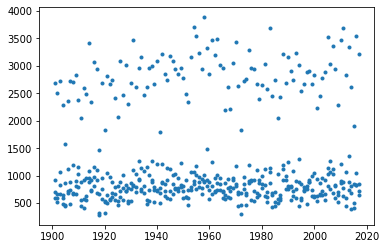

In [11]:
import numpy as np
x=pd.read_csv("Maharashtra.csv")
y=pd.read_csv("Maharashtra.csv")

y1=list(x["YEAR"])
x1=list(x["June-September"])
pr=list(x['SUBDIVISION'])
z1=list(x["JUN"])
w1=list(x["MAY"])

plt.plot(y1, x1,'.')
plt.show()

In [10]:
flood=[]
june=[]
sub=[]

#CREATING A NEW COLOUMN WITH BINARY CLASSIFICATION DEPENDING IF THAT YEAR HAD FLOODED OR NOT, USING RAINFALL OF THAT YEAR AS THRESHOLD
#print(x1[114])
for i in range(0,len(x1)):
    if (x1[i]>3000 and pr[i].strip().contains("Konkan")) or (x1[i]>1000 and not pr[i].strip().contains("Konkan")):
        flood.append('1')
    else:
        flood.append('0')

#print(len(x1))

#APPROAXIMATELY FINDING THE RAINFALL DATA FOR 10 DAYS FOR THE MONTH OF JUNE IN EVERY YEAR FROM 1901 TO 2015
for k in range(0,len(x1)):
    june.append(z1[k]/3)

#FINDING THE INCREASE IN RAINFALL FROM THE MONTH OF MAY TO THE MONTH OF JUNE IN EVERY YEAR FROM 1901 TO 2015
for k in range(0,len(x1)):
    sub.append(abs(w1[k]-z1[k]))

#print(len(flood),len(x1))
df = pd.DataFrame({'flood':flood})
df1=pd.DataFrame({'per_10_days':june})

x["flood"]=flood
x["avgjune"]=june
x["sub"]=sub

#SAVING THE NEW CSV FILE WITH THE NEW COLOUMNS
x.to_csv("out1.csv")
print((x))

      SUBDIVISION  YEAR   JAN   FEB   MAR   APR    MAY    JUN     JUL    AUG  \
0    Konkan & Goa  1901   5.6   0.1   0.4  35.7   19.9  746.1  1075.5  748.0   
1    Konkan & Goa  1902   0.3   0.0   0.0   0.4    7.6  428.2   943.6  515.1   
2    Konkan & Goa  1903   0.0   0.0   0.1   0.0  201.1  470.5  1298.6  673.9   
3    Konkan & Goa  1904   0.0   0.1   6.6   6.3    4.6  975.8   771.7  321.3   
4    Konkan & Goa  1905   0.1   0.1   0.0   0.4    8.6  293.7   770.6  305.5   
..            ...   ...   ...   ...   ...   ...    ...    ...     ...    ...   
463      Vidarbha  2013   6.6  13.0   3.8   2.8    0.5  366.7   535.5  326.1   
464      Vidarbha  2014   1.2  18.3  49.6   2.6    4.0   63.3   337.6  191.7   
465      Vidarbha  2015  26.3   4.7  66.3  28.1   12.8  254.6   137.2  288.9   
466      Vidarbha  2016   0.7   5.2  20.1   5.1   12.4  165.5   490.2  161.8   
467      Vidarbha  2017   0.2   0.0   6.1   0.0    7.3  147.8   252.2  198.3   

     ...  ANNUAL  Jan-Feb  Mar-May  Jun

In [12]:
import scipy 
from scipy.stats import spearmanr

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [20]:
x=pd.read_csv('out1.csv')

X = x.loc[:,["Mar-May","avgjune","sub"]].values
y1=x.loc[:,"flood"].values

(X_train, X_test, Y_train, Y_test) = train_test_split(X, y1, random_state=0)


Lr=LogisticRegression()

Lr.fit(X,y1)
print(Lr.score(X,y1))






0.9145299145299145
0.9230769230769231


In [ ]:
# measuring accuracy